In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df=pd.read_csv("weight-height.xls")

In [5]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [7]:
#Finding the missing values
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

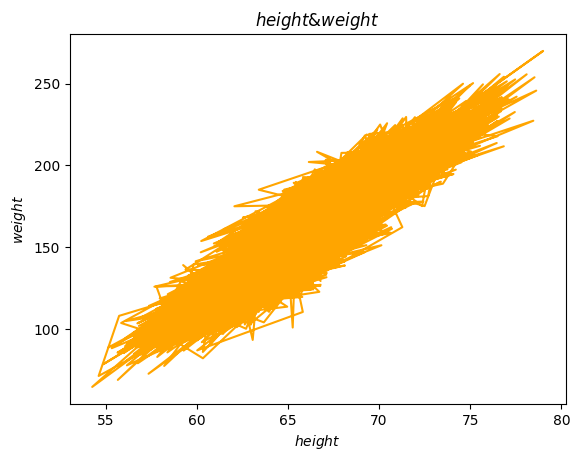

In [8]:
# Plotting height and weight 
plt.plot(df['Height'],df['Weight'],color='orange')
plt.title("$height & weight$")
plt.xlabel("$ height$")
plt.ylabel("$ weight$")
plt.show()

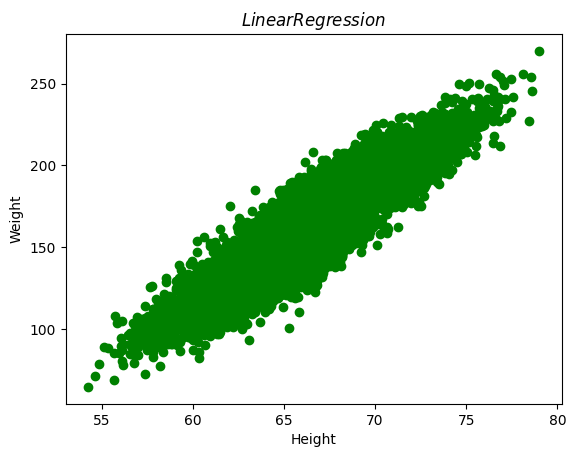

In [9]:
# scatter plot
plt.scatter(df.Height,df.Weight,color='green')
plt.title("$LinearRegression$")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [10]:
# Calculations & Conversions

s=pd.Series(df['Gender'])
df1=s.map({'Male':0,'Female':1})
male=0
female=0
for i in df1:
	if(i==0):
		male=male+1
	else:
		female=female+1
		x=np.array([male,female])
		y=['male','female']

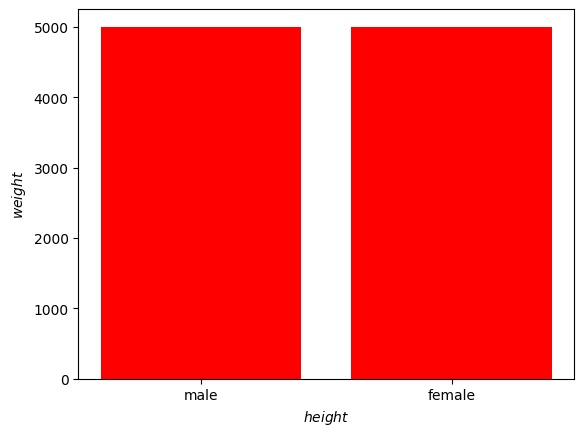

In [11]:
#bar graph
y=['male','female']
plt.bar(y,x,color='red')
plt.xlabel("$ height$")
plt.ylabel("$ weight$")

plt.show()


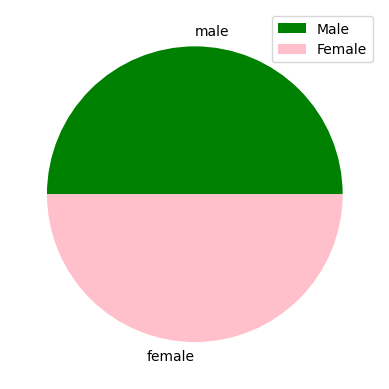

In [12]:
#pie chart
plt.pie(x,labels=y,colors=['green','pink'])
plt.legend(['Male','Female'])
plt.show()

In [13]:
#replacing male with 0 and female with 1
df1=df.replace({'Male':0,'Female':1})
df1

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


In [14]:
import sklearn.model_selection as sk
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
df1.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [16]:
#predicting weight using height
#linear reg
df2=df1[['Height','Weight']]
df2

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
9995,66.172652,136.777454
9996,67.067155,170.867906
9997,63.867992,128.475319
9998,69.034243,163.852461


In [17]:
train,test=sk.train_test_split(df2,test_size=0.25)

In [18]:
# display train 
train

,Height,Weight
7231,64.497291,126.584642
5563,61.600597,136.609346
3236,64.484024,164.646470
2466,68.874776,168.359035
995,68.642628,178.816795
...,...,...
8049,63.633514,144.974697
7391,63.505894,138.221631
4133,65.701244,173.211609
8908,65.651416,137.485522


In [19]:
# Display Test
test

,Height,Weight
812,66.682243,162.766968
7919,65.287809,127.039843
2800,73.390987,203.513415
8390,60.741396,118.418728
314,67.376375,173.310396
...,...,...
6322,59.798587,102.787826
7752,62.114603,110.917344
5393,69.825826,171.486365
8467,62.840801,129.250670


In [20]:
reg= linear_model.LinearRegression()
reg.fit(train[['Height']],train['Weight'])# for training

LinearRegression()

In [22]:
reg.coef_


array([7.700543])

In [23]:
reg.intercept_ 

-349.56278960554846

In [24]:
p=reg.predict(test[['Height']])

In [25]:
test['pre_Weight']=p

In [26]:
test

,Height,Weight,pre_Weight
812,66.682243,162.766968,163.926688
7919,65.287809,127.039843,153.188794
2800,73.390987,203.513415,215.587662
8390,60.741396,118.418728,118.178941
314,67.376375,173.310396,169.271887
...,...,...,...
6322,59.798587,102.787826,110.918803
7752,62.114603,110.917344,128.753379
5393,69.825826,171.486365,188.133987
8467,62.840801,129.250670,134.345500


In [27]:
#y= constant+coeff_1*Weight
c=reg.intercept_+reg.coef_*(68.007994)
c

array([174.13569274])

In [28]:
mean_absolute_error(test['Weight'],test['pre_Weight'])

9.706666684604167

In [29]:
mean_squared_error(test['Weight'],test['pre_Weight'])

148.7356256839295

In [30]:
rmse=np.sqrt(mean_squared_error(test['Weight'],test['pre_Weight']))
rmse

12.195721613907457

In [31]:
r2_score(test['Weight'],test['pre_Weight'])

0.8548585663632648

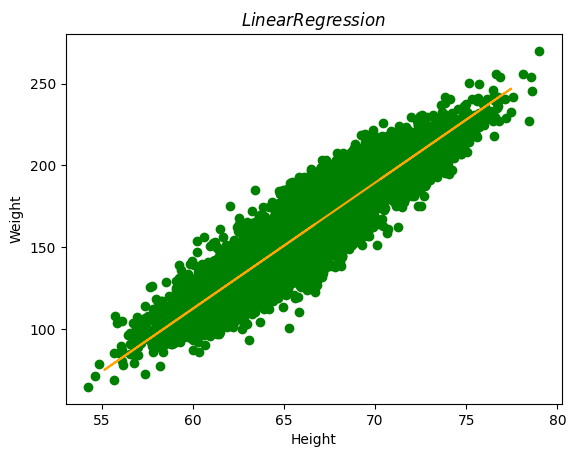

In [35]:
plt.scatter(train.Height,train.Weight,color='green')
plt.plot(test.Height,reg.predict(test[['Height']]),color='orange')
plt.title("$LinearRegression$")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [36]:
df1

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801
...,...,...,...
9995,1,66.172652,136.777454
9996,1,67.067155,170.867906
9997,1,63.867992,128.475319
9998,1,69.034243,163.852461


In [37]:
train1,test1=sk.train_test_split(df1,test_size=0.25)

In [38]:
train1

,Gender,Height,Weight
3288,0,67.724182,176.269148
9161,1,63.649499,134.638715
7045,1,64.742445,167.141598
5324,1,66.640692,133.006943
7036,1,60.519183,133.539208
...,...,...,...
869,0,67.697104,187.423896
3322,0,66.677902,174.741784
7922,1,62.327781,111.965448
1337,0,72.673994,206.980218


In [39]:
test1

,Gender,Height,Weight
6191,1,64.110499,146.756263
5434,1,59.252725,139.140812
2410,0,68.988287,180.365955
8302,1,60.979460,108.469169
3998,0,69.872503,179.664959
...,...,...,...
1905,0,71.652926,207.069125
6655,1,63.422647,138.427956
5390,1,64.325406,156.800504
9586,1,65.630603,157.834902


In [40]:
reg1= linear_model.LinearRegression()
reg1.fit(train1[['Height','Gender']],train1['Weight'])# for training

LinearRegression()

In [41]:
reg1.coef_

array([  5.95804249, -19.62082766])

In [42]:
reg1.intercept_

-224.18593901993984

In [43]:
p1=reg1.predict(test1[['Height','Gender']])

In [44]:
test1['pre_Weight']=p1

In [45]:
test1

,Gender,Height,Weight,pre_Weight
6191,1,64.110499,146.756263,138.166310
5434,1,59.252725,139.140812,109.223489
2410,0,68.988287,180.365955,186.849205
8302,1,60.979460,108.469169,119.511447
3998,0,69.872503,179.664959,192.117402
...,...,...,...,...
1905,0,71.652926,207.069125,202.725236
6655,1,63.422647,138.427956,134.068058
5390,1,64.325406,156.800504,139.446734
9586,1,65.630603,157.834902,147.223157


In [46]:
#y= constant+coeff_1*Weight
c=reg1.intercept_+reg1.coef_*(63.995298,1)
c

array([ 157.10076576, -243.80676668])

In [47]:
mean_absolute_error(test1['Weight'],test1['pre_Weight'])

8.099362811562186

In [48]:
rmse=np.sqrt(mean_squared_error(test1['Weight'],test1['pre_Weight']))
rmse

10.10705898955421

In [49]:
r2_score(test1['Weight'],test1['pre_Weight'])

0.9013727121889629

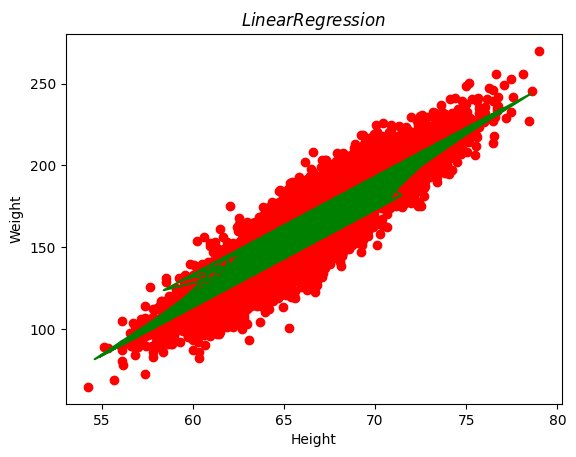

In [52]:
#Scatter Plot
plt.scatter(train1.Height,train1.Weight,color='red')
plt.plot(test1.Height,reg1.predict(test1[['Height','Gender']]),color='g')
plt.title("$LinearRegression$")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()